## Random Maze


### Function to plot maze and show the cell indices

In [2]:
using PyPlot, Random

function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    #figure(figsize=(12, 10), dpi=200)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end

plot_cell_indices (generic function with 1 method)

### Generate random maze

In [6]:
function make_maze(n)
    H = trues(n, n-1)
    V = trues(n-1, n)
    visit = falses(n,n)
    visit[1,1] = true
    a = 0; b = 0;

    # Creating the dig function
    function dig(x,y)
        choices = randperm(4)
        a == x; b == y;
        for i = 1:4
            if choices[i] == 1 && x <= n - 1
                if visit[x + 1,y] == false
                    V[x,y] = false
                    x += 1
                    visit[x,y] = true
                    dig(x,y)    # Calling the function recursively
                    dig(x-1,y)
                end
            elseif choices[i] == 2 && x - 1 >= 1
                if visit[x - 1,y] == false
                    V[x - 1,y] = false
                    x -= 1
                    visit[x,y] = true
                    dig(x,y)
                    dig(x+1,y)
                end
            elseif choices[i] == 3 && y <= n - 1
                if visit[x,y + 1] == false
                    H[x,y] = false
                    y += 1
                    visit[x,y] = true
                    dig(x,y)
                    dig(x,y-1)
                end
            elseif choices[i] == 4 && y - 1 >= 1
                if visit[x,y - 1] == false
                    H[x,y - 1] = false
                    y -= 1
                    visit[x,y] = true
                    dig(x,y)
                    dig(x,y+1)
                end
            end

            # Ends the recurison if all cells surrounding the cell its on have been visited
            if x == a && y == b
                return 1
            end
        end
    end

    dig(1,1)
    return H, V, visit
end

make_maze (generic function with 1 method)

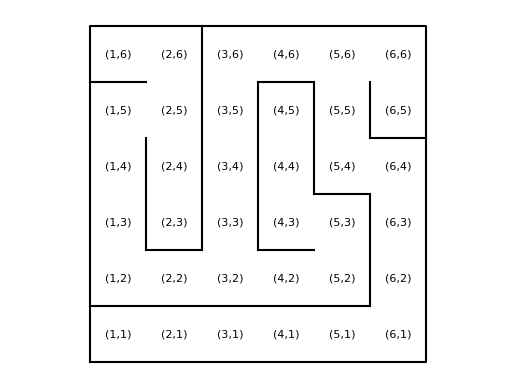

In [7]:
H,V,visit = make_maze(6)
plot_maze(H,V)
plot_cell_indices(size(H,1))

### Find path from `1,n` to `n,1`


In [8]:
function find_path(H,V)
    visit = falses(size(H,1), size(V,2))
    visit[1, size(H,1)] = true
    pathx = Int64[1]; pathy = Int64[size(H,1)]

    function recur(x,y) # Function basically follows the same method as dig function 
        a = x; b = y;
        if x + 1 <= size(H,1) && V[x,y] == false
            if visit[x+1,y] == false
                x += 1
                visit[x,y] = true
                push!(pathx, x)
                push!(pathy,y)
                recur(x,y)
                recur(x-1,y)
            end
        end
        if x - 1 >= 1 && V[x - 1,y] == false
            if visit[x-1,y] == false
                x -=1
                visit[x,y] = true
                push!(pathx, x)
                push!(pathy,y)
                recur(x,y)
                recur(x+1,y)
            end
        end
        if y + 1 <= size(H,1) && H[x,y] == false
            if visit[x,y+1] == false
                y += 1
                visit[x,y] = true
                push!(pathx, x)
                push!(pathy,y)
                recur(x,y)
                recur(x,y-1)
            end
        end
        if y - 1 >= 1 && H[x,y-1] == false
            if visit[x,y-1] == false
                y -=1
                visit[x,y] = true
                push!(pathx, x)
                push!(pathy,y)
                recur(x,y)
                recur(x,y+1)
            end
        end
        if x == a && y == b # Breaking the recursion
            if pathx[end] == size(H,1) && pathy[end] == 1 # Checking to see if the last cells is the one we want
                return pathx, pathy
            end
            pop!(pathx) # Removing the checked cells until it ends with cell we want
            pop!(pathy)
            return 1
        end
    end
    
    recur(1,size(H,1))
    return pathx, pathy
end

find_path (generic function with 1 method)

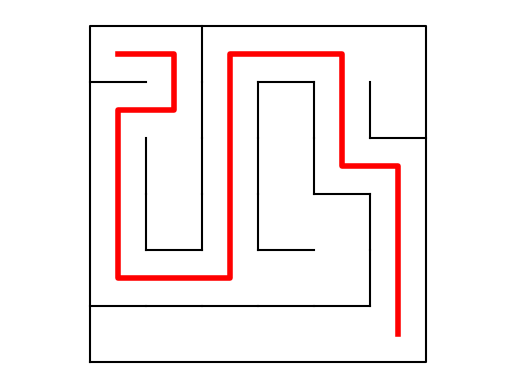

In [9]:
find_path(H,V)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

### Problem 3 - Large maze test

Finally, run the code below to illustrate your codes.

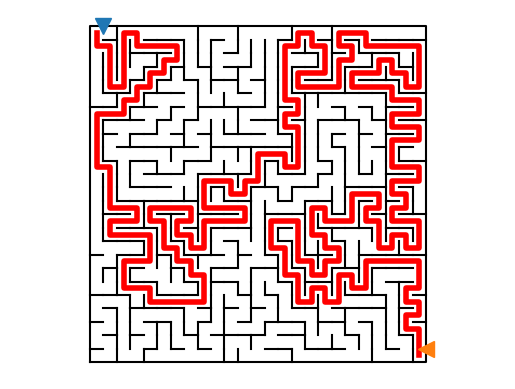

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1c7de6160>

In [10]:
n = 25
H,V = make_maze(n)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);
plot(1,size(H,1), marker="v",  markersize=12)
plot(size(H,1), 1, marker="<",  markersize=12)